<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Fabián Castellano Núñez

__Rol__: 201610012-1

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

In [1]:
#este comando solo funciona en linux, por tanto lo pegue de forma manual
# !cat data/Readme.txt

### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Modelo a elección](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
sns.set_style("dark")
%matplotlib inline

In [3]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

#### Features 
Nuestro *dataset* contiene 9 columnas, de las cuales 8 son datos, y 1 es nuestro target, procederemos a describir brevemente cada una:
1. mean_integrated_profile: Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

### Análisis descriptivo

Primero, y por no perder la costumbre, revisemos los valores `nan`

In [4]:
df.isna().sum()

mean_integrated_profile               0
std_integrated_profile                0
excess_kurtosis_integrated_profile    0
skewness_integrated_profile           0
mean_dmsnr                            0
std_dmsnr                             0
excess_kurtosis_dmsnr                 0
skewness_dmsnr                        0
is_pulsar                             0
dtype: int64

No tenemos nan, eso siempre es bueno, ahora realizemos una revisión por los estadísticos comunes

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_integrated_profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
std_integrated_profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
excess_kurtosis_integrated_profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
skewness_integrated_profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
mean_dmsnr,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392140
std_dmsnr,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
excess_kurtosis_dmsnr,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
skewness_dmsnr,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309331,1191.000837
is_pulsar,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


Podemos ver que hay algunos valores negativos, en curtosis y *skewness*. Revisemos la desviación estándar relativa.

In [6]:
df.describe().T['std']/df.describe().T['mean']

mean_integrated_profile               0.230941
std_integrated_profile                0.147009
excess_kurtosis_integrated_profile    2.226689
skewness_integrated_profile           3.484148
mean_dmsnr                            2.336449
std_dmsnr                             0.739580
excess_kurtosis_dmsnr                 0.542670
skewness_dmsnr                        1.015801
is_pulsar                             3.149703
dtype: float64

Podemos ver que hay algunas variables que varian más que otras relativamente, pero no diaría que es nada exagerado. Eso si, viendo la descripción de los datos, podemos ver que hay un gap importante entre el tercer cuartil cuartil y los máxmios, y de forma similar entre el segundo y el minimo, exploremos esto un poco.

### Valores atípicos
Como mencionamos antres, a *grosso modo* podemos ver que la diferencia entre los quintiles y los máximos es grande, revisemoslo de mejor forma cuantificandolo como cuantas desviaciones estandard estamos hablando.

In [7]:
for i in df.columns:
    print((df[i].max()-df[i].quantile(0.75))/df[i].std())

2.5545322233391916
6.978574728196435
7.139016285399656
10.890853347070559
7.394179253489803
4.222480206503695
5.289924318770581
9.873689649267295
3.46701705944152


In [8]:
for i in df.columns:
    print((-df[i].min()+df[i].quantile(0.75))/df[i].std())

4.72746825261019
3.8361001952981586
2.20794048130821
0.44093828224645754
0.1781652181668338
1.0815127466474903
3.0718923019456814
1.3264508931853793
0.0


Podemos ver, en especial con los máximos, que hay datos muy alejados, revisemos esto con un boxplot que nois ayudará a hacernos una idea de la densidad de *outlayers*. Notemos que los ejes x son distinos.

Podemos ver que es impresionante la cantidad de outlayers presentes en cada variable. Sería interesante estudiar como se comporatan nuestros datos sin estos, o si son estos los que tienen alguna relación. Para esto podemos ver si hay alguna relación entre ser outliear y ser Pulsar. Para esto pasaremos a la siguiente sección.

### Target

La varibale *target* en estos datos es `is_pulsar`, revisemos que tan presentes están nuestros estos en nuestros datos .

In [10]:
df.groupby('is_pulsar')['is_pulsar'].apply(lambda x : x.count())

is_pulsar
0    16259
1     1639
Name: is_pulsar, dtype: int64

In [11]:
is_p = df.groupby('is_pulsar')['is_pulsar'].apply(lambda x : x.count())
is_p[1]/(is_p[0]+is_p[1])

0.09157447759526204

Podemos ver que son alrededor de 9.1%, ahora vemos como se comportan los outliers.

In [12]:
for i in df.drop('is_pulsar', axis=1).columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    filtered = df.query('(@Q1 - 1.5 * @IQR) <= '+ i +' <= (@Q3 + 1.5 * @IQR)')
    is_p = (filtered.groupby('is_pulsar')
                    ['is_pulsar']
                    .apply(lambda x : x.count()))
    print(is_p[1]/(is_p[0]+is_p[1]))

0.040965141095565566
0.08516670446813336
0.01729849098270151
0.020441332749890604
0.023779306659541782
0.034657921810699585
0.093676411464017
0.09589927634288403


De forma interesante, en algunos valores, en especifico 5, parece ser significativo ser un *outlier* y para los otros 3 no, esto nos indica a pensar que los outliers no son solo ruido, sino que exiswte una relación que quizá valga la pena revisar. Pero, por ahora, continuemos con la revisión

<a id='visualization'></a>

## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [25]:
df.groupby('is_pulsar').get_group(0)

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


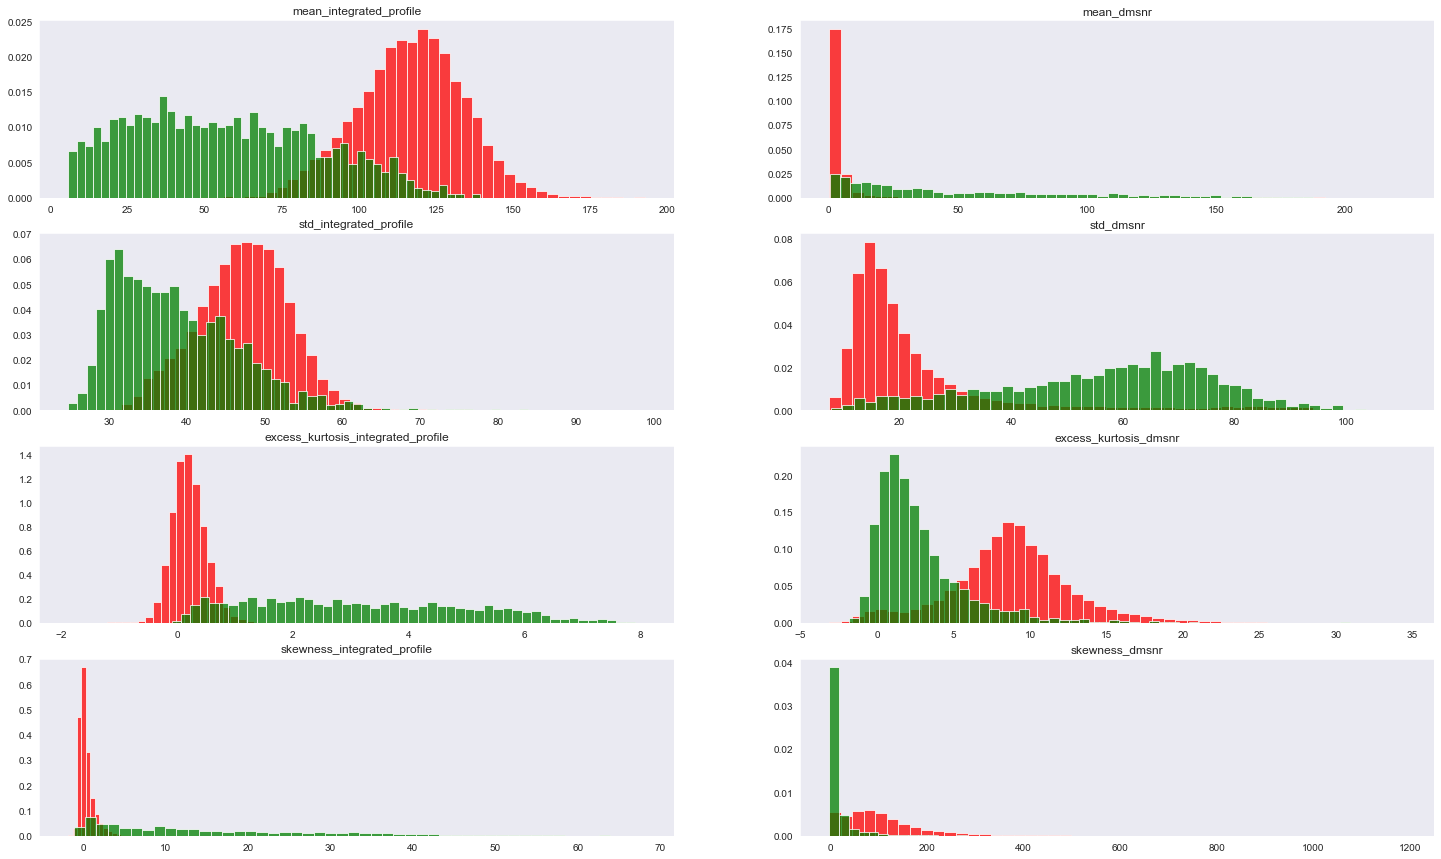

In [27]:
f, axes = plt.subplots(4, 2, figsize=(25,15))
col = 0
for j in range(2):
    for k in range(4):
        i = df.columns[col]
        axes[k][j].hist(df.groupby('is_pulsar').get_group(0)[i], 50, density=True, facecolor='r', alpha=0.75)
        axes[k][j].hist(df.groupby('is_pulsar').get_group(1)[i], 50, density=True, facecolor='g', alpha=0.75)
        axes[k][j].set_title(i)
        col+=1

In [ ]:
f, axes = plt.subplots(8, 8, figsize=(25,25))
for i in range(8):
    for j in range(8):
        if i != j:
            axes[i][j].scatter(df.groupby('is_pulsar').get_group(0)[df.columns[i]]
                               , df.groupby('is_pulsar').get_group(0)[df.columns[j]]
                               , marker='x'
                               , color = 'r'
                               , s = 1
                              )
            axes[i][j].scatter(df.groupby('is_pulsar').get_group(1)[df.columns[i]]
                               , df.groupby('is_pulsar').get_group(1)[df.columns[j]]
                               , marker='o'
                               , color = 'g'
                               , s = 1
                              )
        else:
            axes[i][j].hist(df.groupby('is_pulsar').get_group(0)[df.columns[i]]
                            , 50
                            , density=True
                            , facecolor='r'
                            , alpha=0.75)
            axes[i][j].hist(df.groupby('is_pulsar').get_group(1)[df.columns[i]]
                            , 50
                            , density=True
                            , facecolor='g'
                            , alpha=0.75)
        if j == 0:
            axes[i][j].set_xlabel(df.columns[j])
        if i == 7:
            axes[i][j].set_ylabel(df.columns[i])

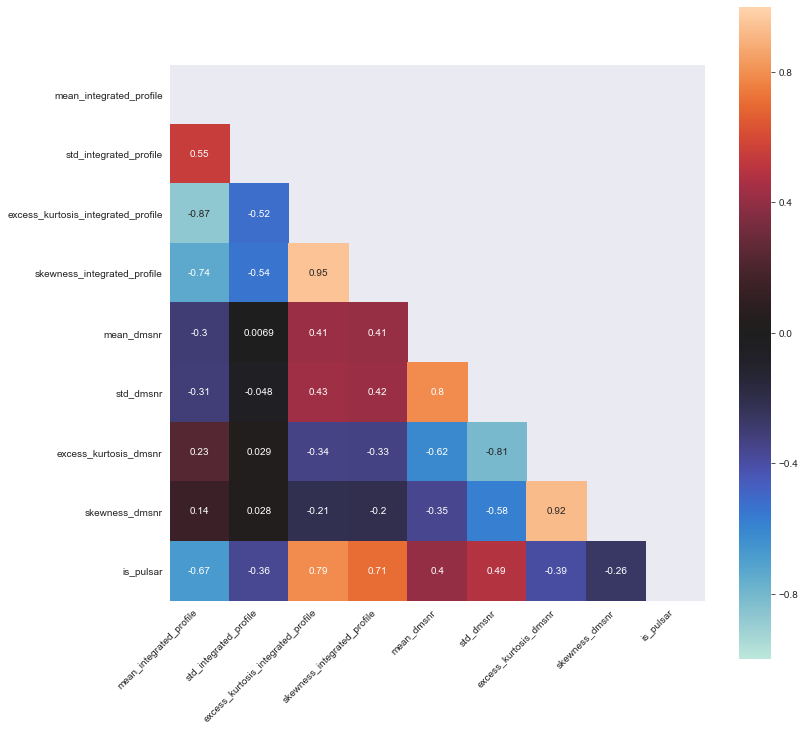

In [15]:
fig, ax = plt.subplots(figsize = (12, 12))
matrix = np.triu(df.corr())
heatmap = sns.heatmap(df.corr()
                      , annot = True
                      , mask = matrix
                      , square = True
                      , vmin = -1
                      , vmax = 1
                      , center = 0
                     )
heatmap.set_xticklabels(heatmap.get_xticklabels()
                        , rotation=45
                        , horizontalalignment='right'
                       )
heatmap

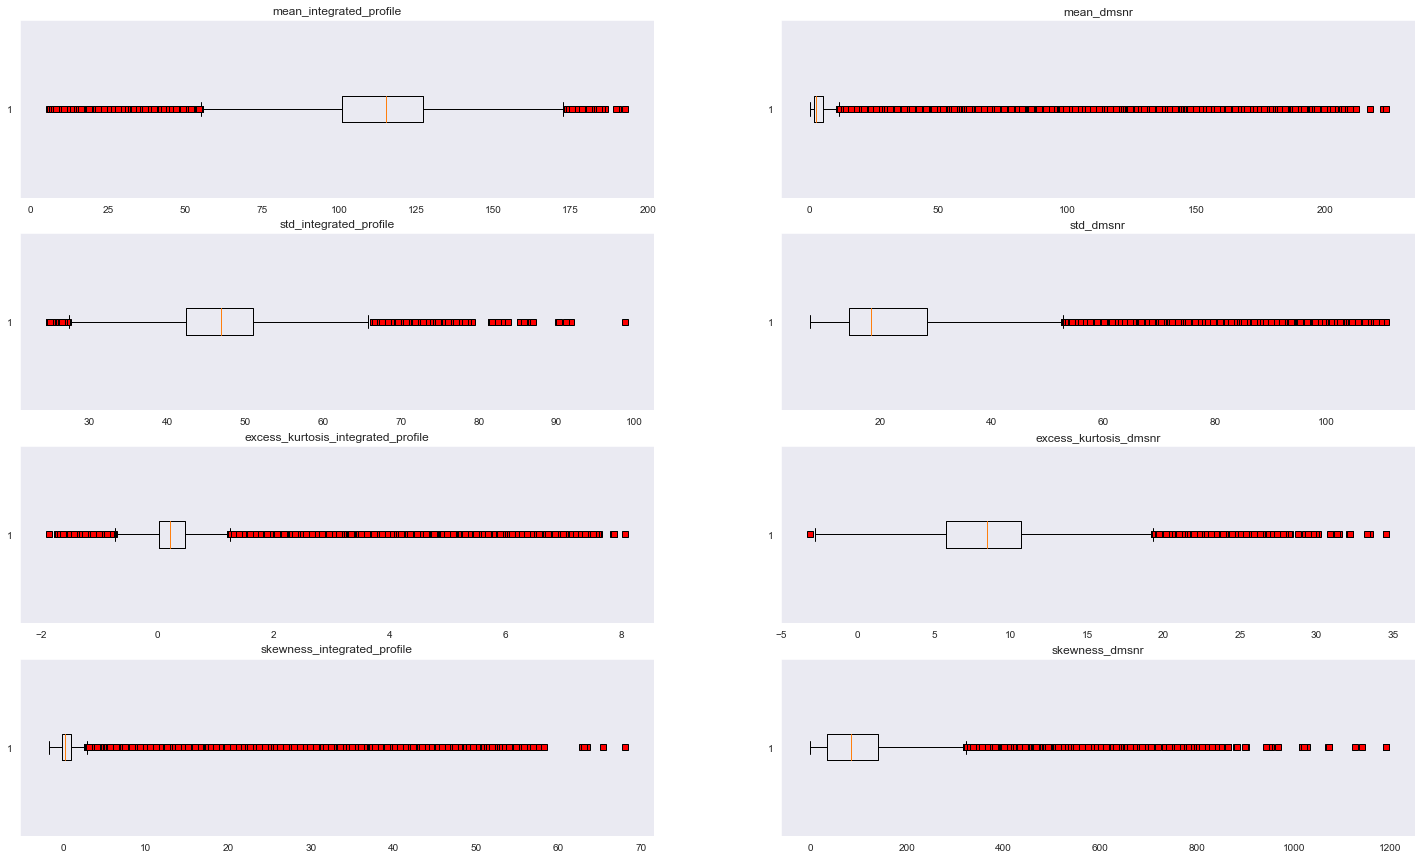

In [18]:
f, axes = plt.subplots(4, 2, figsize=(25,15))
col = 0
for j in range(2):
    for k in range(4):
        i = df.columns[col]
        red_square = dict(markerfacecolor='r', marker='s')
        axes[k][j].set_title(i)
        axes[k][j].boxplot(df[i], vert=False, flierprops=red_square, whis=1.75)
        col+=1

<a id='preprocessing'></a>

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
X_raw = (df.drop('is_pulsar',axis=1)
           .to_numpy())
y = df['is_pulsar'].to_numpy()

In [18]:
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

In [19]:
print('Promedio:', np.mean(X))
print('Sesviación Estandar:',np.std(X))

Promedio: 2.381973636473685e-18
Sesviación Estandar: 1.0


Notemos que el valor del promedio no es cero *exactamente*, pero es básicamente cero.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size=0.3
                                                    , random_state = 42
                                                   )

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [22]:
logistic = LogisticRegression()
logistic_cv = cross_validate(logistic
                             , X_train
                             , y_train
                             , cv=5
                            )

In [23]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.5f} +/- {np.std(logistic_cv["test_score"]):.5f}')

Logistic Regression Cross Validation precision score: 0.97885 +/- 0.00140


In [24]:
logistic.fit(X_train,y_train)
logistic.score(X_test,y_test)

0.9782122905027933

<a id='knn'></a>

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [26]:
parameters = np.arange(1,100)
digits_gscv = GridSearchCV(estimator = KNeighborsClassifier()
                           , param_grid = {'n_neighbors': parameters}
                          ).fit(X_train,y_train)
digits_gscv.best_params_['n_neighbors']

11

In [27]:
knn = KNeighborsClassifier(**digits_gscv.best_params_)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [28]:
knn.score(X_test,y_test)

0.9797020484171323

In [29]:
knn_cv = cross_validate(knn,X_train,y_train,cv=5)

In [30]:
print(f'KNN Cross Validation precision score: {np.mean(knn_cv["test_score"]):.5f} +/- {np.std(knn_cv["test_score"]):.5f} with train data.')

KNN Cross Validation precision score: 0.97869 +/- 0.00153 with train data.


<a id='free_style'></a>

## Modelo a elección

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
my_model = SGDClassifier()

In [33]:
grid = {
    'alpha': [1e-7,1e-6,1e-5,1e-4, 1e-3, 1e-2, 1e-1], # learning rate
    'max_iter': [1e3,1e4,1e5,1e6], # number of epochs
    'loss': ['hinge', 'log'],
    'penalty': ['l2','l1','elasticnet'],
    'n_jobs': [-1]
}
my_model_gs = GridSearchCV(estimator = my_model
                           , param_grid = grid
                          ).fit(X_train,y_train)
my_model_gs.best_params_

{'alpha': 0.0001,
 'loss': 'hinge',
 'max_iter': 10000.0,
 'n_jobs': -1,
 'penalty': 'l1'}

In [34]:
sgd = SGDClassifier(**my_model_gs.best_params_, random_state = 42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.9810055865921787

In [35]:
my_model_cv = cross_validate(sgd, X_train, y_train, cv = 5)

In [36]:
print(f'MY MODEL Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.5f} +/- {np.std(my_model_cv["test_score"]):.5f} with train data.')

MY MODEL Cross Validation precision score: 0.97645 +/- 0.00293 with train data.


<a id='model_selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.

In [37]:
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import plot_confusion_matrix

### Presition Score

In [38]:
print(f'Logistic Regression test precision score: {precision_score(y_test,logistic.predict(X_test)):.5f}')

Logistic Regression test precision score: 0.94245


In [39]:
print(f'KNN test precision score: {precision_score(y_test,knn.predict(X_test)):.5f}')

KNN test precision score: 0.94145


In [40]:
print(f'MY MODEL test precision score:{precision_score(y_test,sgd.predict(X_test)):.5f}')

MY MODEL test precision score:0.93439


### Confusion Matrix

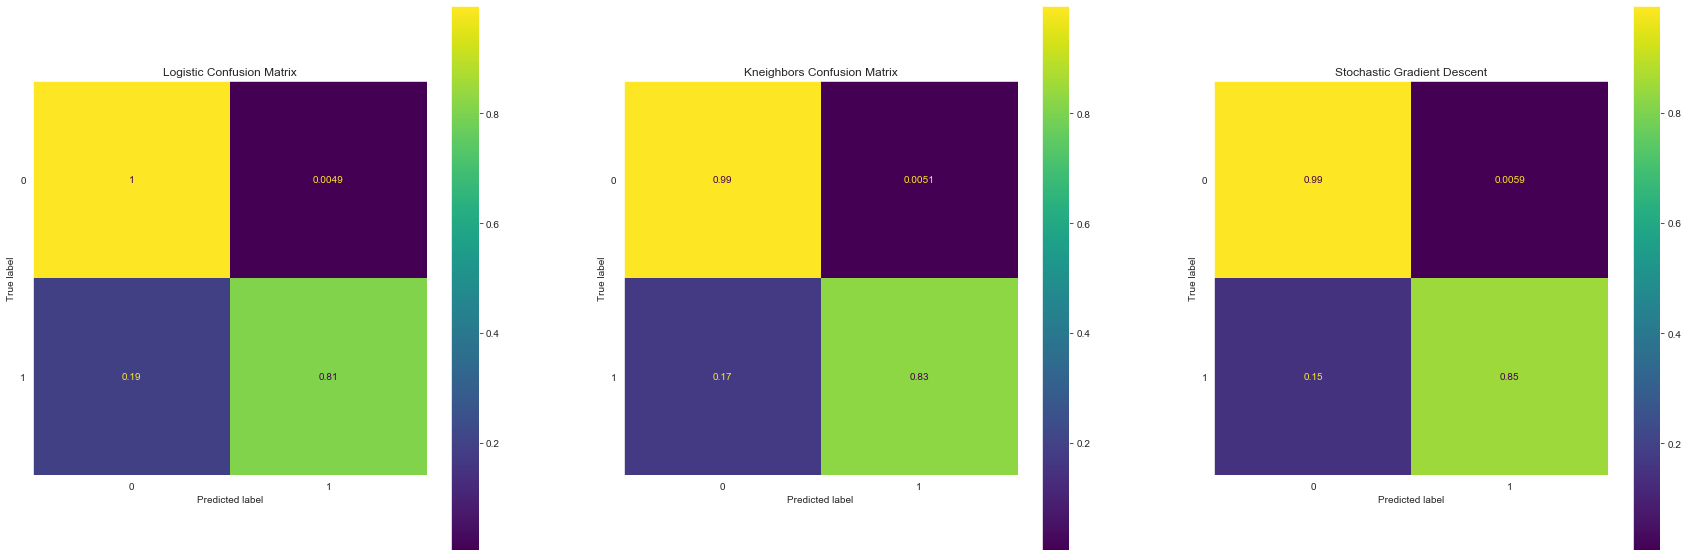

In [41]:
fig,axes= plt.subplots(1,3,figsize=(30,10))

plot_confusion_matrix(logistic, X_test, y_test,ax=axes[0],normalize='true')
axes[0].set_title('Logistic Confusion Matrix')

plot_confusion_matrix(knn, X_test, y_test,ax=axes[1],normalize='true')
axes[1].set_title('Kneighbors Confusion Matrix')

plot_confusion_matrix(sgd, X_test, y_test,ax=axes[2],normalize='true')
axes[2].set_title('Stochastic Gradient Descent')
plt.show()

### Confidence intterval

In [42]:
print(f'Confidence intterval of Logistic Regression fit time : {np.mean(cross_validate(logistic,X_train,y_train)["fit_time"]):.5f} +/- {np.std(cross_validate(logistic,X_train,y_train)["fit_time"]):.5f} ')

Confidence intterval of Logistic Regression fit time : 0.04557 +/- 0.00413 


In [43]:
print(f'Confidence intterval of KNegihbors fit time: {np.mean(cross_validate(knn,X_train,y_train)["fit_time"]):.5f} +/- {np.std(cross_validate(knn,X_train,y_train)["fit_time"]):.5f} ')

Confidence intterval of KNegihbors fit time: 0.03378 +/- 0.00465 


In [44]:
print(f'Confidence interval of Stochastic Gradient Descent fit time: {np.mean(cross_validate(sgd,X_train,y_train)["fit_time"]):.5f} +/- {np.std(cross_validate(sgd,X_train,y_train)["fit_time"]):.5f} ')

Confidence interval of Stochastic Gradient Descent fit time: 0.04018 +/- 0.00426 


<a id='conclusions'></a>

## Conclusiones

Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultados, etc.